In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# using Random Forest feature_importances

In [2]:
x = pd.read_csv('./features_reduced_imputed.csv')
x.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [3]:
y = pd.read_csv('./target.csv')
y = y['LET_IS']

In [4]:
model = RandomForestClassifier()
model.fit(x, y)

RandomForestClassifier()

In [5]:
model = model.feature_importances_
#print(model.feature_importances_, '\n')

# 시리즈로 만들어 인덱스를 붙인다
ser = pd.Series(model, index=x.columns)

# 내림차순 정렬을 이용한다
ser = ser.sort_values(ascending=False)
print(ser)

K_SH_POST       0.063391
AGE             0.045448
L_BLOOD         0.043047
ROE             0.036380
NA_BLOOD        0.036170
                  ...   
n_r_ecg_p_10    0.000021
n_r_ecg_p_09    0.000002
nr_07           0.000000
n_p_ecg_p_01    0.000000
np_07           0.000000
Length: 100, dtype: float64


# Convert Z-Score

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


x = pd.read_csv('./features_reduced_imputed.csv')
x.drop(['Unnamed: 0'], axis = 1, inplace = True)

x.columns

Index(['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB',
       'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03',
       'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08',
       'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01',
       'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST',
       'K_SH_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im',
       'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_04',
       'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01',
       'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05',
       'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
       'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05',
       'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09',
       'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
       'fibr_ter_02', 'fibr_ter_03',

In [7]:
li = ['AGE', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE'] #나머지 continues variable은 상관관계에서 drop된걸로 보임

for column in li:
    series = x[column]
    # Series 객체를 numpy 배열로 변환
    array = series.values
    # 1D 배열을 2D 배열로 변환
    array_reshaped = array.reshape(-1, 1)
    # StandardScaler를 사용하여 정규화 수행
    scaler = StandardScaler()
    normalized_array = scaler.fit_transform(array_reshaped)
    # 정규화된 데이터를 다시 1D 배열로 변환
    normalized_array_1d = normalized_array.flatten()
    # 결과를 데이터프레임에 다시 할당
    x[column] = normalized_array_1d

In [8]:
x['AGE']

0       1.347079
1      -0.610641
2      -0.877603
3       0.546194
4      -0.165705
          ...   
1695    1.347079
1696    0.724168
1697   -0.610641
1698    1.525054
1699    0.101257
Name: AGE, Length: 1700, dtype: float64

# RandomForest Feature Importance (+ Convert Z score)

In [9]:
model = RandomForestClassifier()
model.fit(x, y)

RandomForestClassifier()

In [10]:
ser = pd.Series(model.feature_importances_, index=x.columns)

# 내림차순 정렬을 이용한다
ser = ser.sort_values(ascending=False)
print(ser)

K_SH_POST       0.059805
AGE             0.046127
L_BLOOD         0.042831
ROE             0.038753
NA_BLOOD        0.035578
                  ...   
fibr_ter_05     0.000010
nr_07           0.000000
np_07           0.000000
n_r_ecg_p_09    0.000000
n_r_ecg_p_10    0.000000
Length: 100, dtype: float64


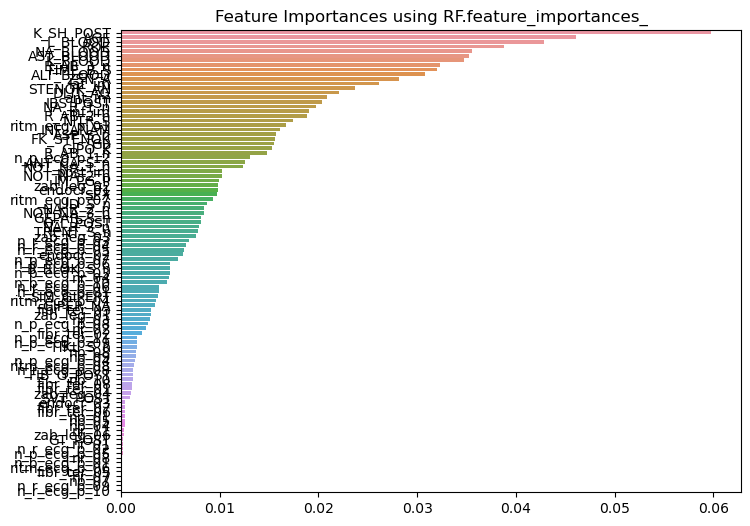

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
plt.title('Feature Importances using RF.feature_importances_')
sns.barplot(x=ser, y=ser.index)
plt.show()

In [14]:
#prefix sum
ser = ser.sort_values(ascending=False)

threshold = 0.94
s = 0
li = []
cnt = 0
for i in range(len(ser)):
    cnt += 1
    s += ser[i]
    li.append(ser[i].index)
    if(s >= threshold):
        break
    
print(cnt)

AttributeError: 'numpy.float64' object has no attribute 'index'

In [13]:
sum(ser)

1.0000000000000002